Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


Load Dataset

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Understanding Dataset

In [3]:
train.shape
train.info()
train.describe()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


Separate Target Column

In [11]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']


Data Cleaning (train Data)

In [12]:
# Numeric columns median
X = X.fillna(X.median(numeric_only=True))

# Categorical columns
X = X.fillna("None")


Clean Test Data

In [13]:
test = test.fillna(test.median(numeric_only=True))
test = test.fillna("None")


Convert Categorical to Numeric

In [14]:
X = pd.get_dummies(X)
test = pd.get_dummies(test)


Align Columns

In [15]:
X, test = X.align(test, join='left', axis=1, fill_value=0)


Split Train & Validation

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Model

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Evaluate Model

In [18]:
pred = model.predict(X_val)

print("R2 Score:", r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))


R2 Score: 0.44337261621923574
MAE: 21126.352833228062


Predict Test Data

In [19]:
test_predictions = model.predict(test)


Save Output File

In [20]:
output = pd.DataFrame({
    'Id': test.index,
    'SalePrice': test_predictions
})

output.to_csv('submission.csv', index=False)


In [22]:
comparison = pd.DataFrame({
    'Actual Price': y_val.values,
    'Predicted Price': pred
})

comparison.head(10)


,Actual Price,Predicted Price
0,154500,160280.589291
1,325000,343257.743962
2,115000,89964.556929
3,159000,176551.474879
4,315500,321041.780362
5,75500,67931.176818
6,311500,239480.623383
7,146000,146644.894260
8,84500,62691.309629
9,135500,151553.999084


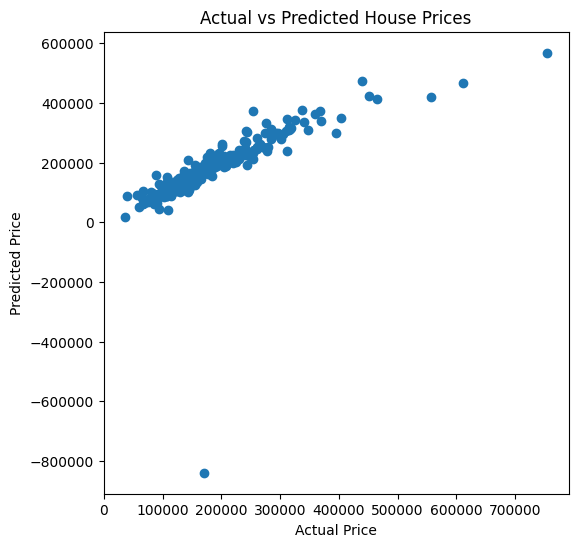

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


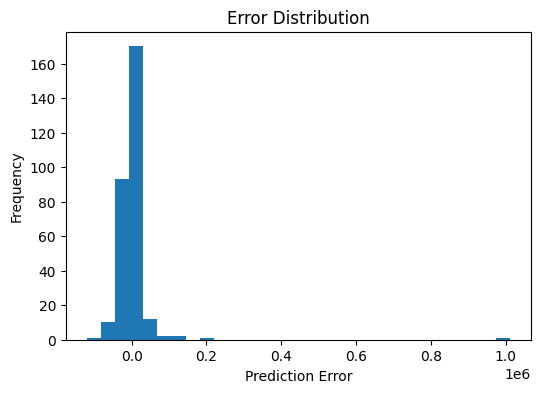

In [24]:
errors = y_val - pred

plt.figure(figsize=(6,4))
plt.hist(errors, bins=30)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()


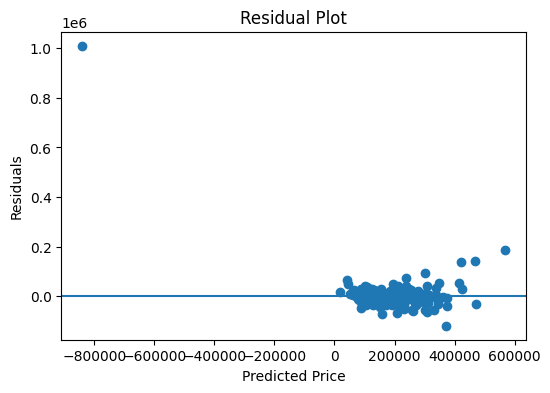

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(pred, errors)
plt.axhline(y=0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
